In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from htc_projects.sepsis_icu.settings_sepsis_icu import settings_sepsis_icu
from htc_projects.sepsis_icu.tables import first_inclusion
from htc_projects.sepsis_icu.utils import save_figure, target_to_label

In [2]:
plt.rcParams["font.family"] = settings_sepsis_icu.font_family
plt.rcParams["font.sans-serif"] = settings_sepsis_icu.font
plt.rcParams["font.size"] = settings_sepsis_icu.font_size
plt.rcParams["xtick.labelsize"] = settings_sepsis_icu.font_size
plt.rcParams["ytick.labelsize"] = settings_sepsis_icu.font_size

In [3]:
param_order = ["sto2", "nir", "thi", "twi"]
param_mapping = {
    "sto2": "oxygen saturation",
    "nir": "perfusion index",
    "thi": "haemoglobin index",
    "twi": "water index",
}

In [4]:
def plot_tpi(target: str = "sepsis", label_name: str = "palm") -> None:
    fig, ax = plt.subplots(
        1,
        4,
        figsize=(settings_sepsis_icu.page_width_inch, 2),
        constrained_layout=True,
    )  # figsize according to Science Advances style
    target_label = target_to_label(target)
    df = first_inclusion(target, label_name)
    if target == "sepsis":
        palette = settings_sepsis_icu.disease_colors
        order = ["no_sepsis", "sepsis"]
        x_label = "sepsis status"
        x_tick_labels = ["no sepsis", "sepsis"]
    elif "shock" in target:
        mapping = {
            True: "shock",
            False: "no_shock",
        }
        df[target_label] = df[target_label].map(mapping)
        palette = settings_sepsis_icu.shock_colors
        order = ["no_shock", "shock"]
        x_label = "shock status"
        x_tick_labels = ["no shock", "shock"]
    else:
        palette = settings_sepsis_icu.survival_colors
        order = [True, False]
        x_label = "survival status"
        x_tick_labels = ["survivor", "non-survivor"]

    for j, param in enumerate(param_order):
        ax[j].set_title(param_mapping[param])
        sns.boxplot(
            df,
            x=settings_sepsis_icu.task_mapping[target],
            y=f"median_{param}",
            hue=settings_sepsis_icu.task_mapping[target],
            palette=palette,
            showmeans=True,
            meanline=True,
            order=order,
            showfliers=False,
            meanprops=dict(linestyle="dotted", linewidth=1, color="black"),
            ax=ax[j],
        )
        for patch in ax[j].patches:
            fc = patch.get_facecolor()
            patch.set_facecolor(mpl.colors.to_rgba(fc, 0.5))
        sns.stripplot(
            data=df,
            x=settings_sepsis_icu.task_mapping[target],
            y=f"median_{param}",
            hue=settings_sepsis_icu.task_mapping[target],
            dodge=True,
            marker=".",
            palette=palette,
            order=order,
            s=5,
            linewidth=0.5,
            ax=ax[j],
        )
        ax[j].grid(True, linestyle="dotted")
        if j == 0:
            ax[j].set_ylabel("index value [a.u.]", fontsize=settings_sepsis_icu.font_size)
        else:
            ax[j].set_ylabel("")
        ax[j].set_xlabel(x_label, fontsize=settings_sepsis_icu.font_size)
        ax[j].set_xticklabels(x_tick_labels)
        if ax[j].get_legend() is not None:
            ax[j].get_legend().remove()

    savepath = settings_sepsis_icu.results_dir / "paper_figures" / f"TPI_distributions_{label_name}_{target}.pdf"
    savepath.parent.mkdir(parents=True, exist_ok=True)
    save_figure(savepath, fig, dpi=300)

[WARNING][py.warnings] /tmp/ipykernel_2012332/1009938214.py:68: UserWarning: set_ticklabels() should     warnings.py:110
only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.                              
  ax.set_xticklabels(x_tick_labels)                                                                                     
                                                                                                                        

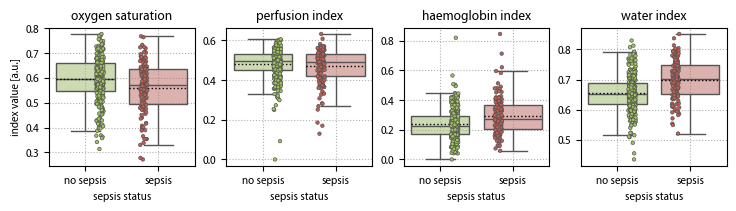

In [5]:
plot_tpi("sepsis", "palm")

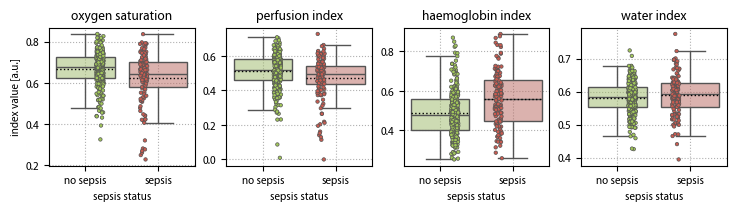

In [6]:
plot_tpi("sepsis", "finger")

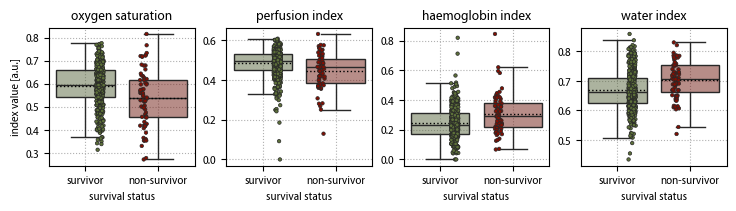

In [7]:
plot_tpi("survival", "palm")

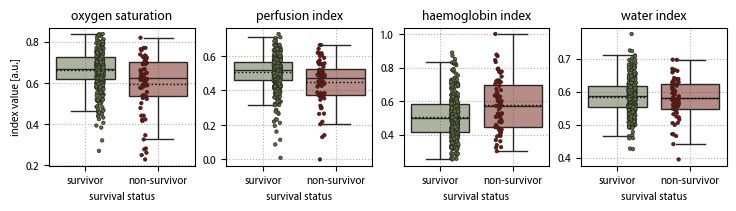

In [8]:
plot_tpi("survival", "finger")